In [52]:
import skfuzzy as fuzz
import numpy as np
import pandas as pd
from skfuzzy import control as ctrl


In [53]:
dataFrame = pd.read_csv('CHD.csv')
dataFrame.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [54]:
dataFrame

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,1,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,1,50,0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4129,1,51,1,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4130,0,48,0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4131,0,44,0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,82.0,0


In [55]:
dataFrame.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000,4133.000000
mean,0.427293,49.557222,0.280668,0.494798,9.101621,0.034358,0.006049,0.311154,0.025647,236.664408,132.367046,82.872248,25.778571,75.925236,81.946528,0.151948
std,0.494745,8.561628,0.449380,0.500033,11.918440,0.182168,0.077548,0.463022,0.158100,43.909188,22.080332,11.952654,4.074360,12.049188,22.860954,0.359014
min,0.000000,32.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.060000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,1.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,89.500000,27.990000,83.000000,85.000000,0.000000
max,1.000000,70.000000,1.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Membership Functions

c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


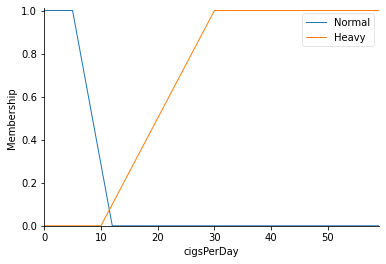

In [56]:
cigsPerDay	 = ctrl.Antecedent(np.arange(0, 60), 'cigsPerDay')
cigsPerDay['Normal'] = fuzz.trapmf(cigsPerDay.universe, [-1, 0, 5, 12])
cigsPerDay['Heavy'] = fuzz.trapmf(cigsPerDay.universe, [10,30 ,59, 60])
cigsPerDay.view()

c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


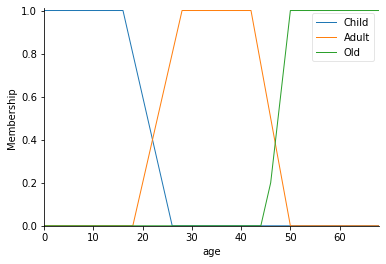

In [57]:
age = ctrl.Antecedent(np.arange(0, 70, 2), 'age')
age['Child'] = fuzz.trapmf(age.universe, [-1, 0, 16, 26])
age['Adult'] = fuzz.trapmf(age.universe, [18, 28, 42, 50])
age['Old'] = fuzz.trapmf(age.universe, [45, 50, 79, 80])
age.view()

In [58]:

# diabetes = ctrl.Antecedent(np.arange(0, 1.1, 0.0001), 'diabetes')
# diabetes['True'] = fuzz.trapmf(diabetes.universe, [0.5, 0.5, 1.1, 1.1])
# diabetes['True'].view()


c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


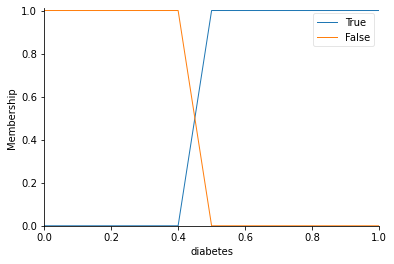

In [59]:
diabetes = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'diabetes')
diabetes['True'] = fuzz.trapmf(diabetes.universe, [0.5, 0.5,1, 1.5])
diabetes['False'] = fuzz.trapmf(diabetes.universe, [-1, 0, 0.4, 0.5])

diabetes.view()


c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


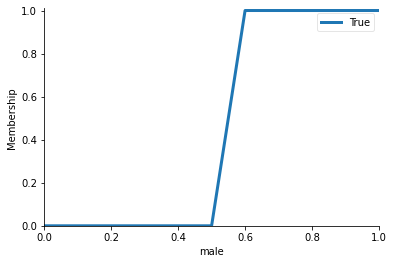

In [60]:
male = ctrl.Antecedent(np.arange(0, 1.1, 0.1), 'male')
male['True'] = fuzz.trapmf(male.universe, [0.5, 0.6, 1, 1.5])
male['True'].view()

c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


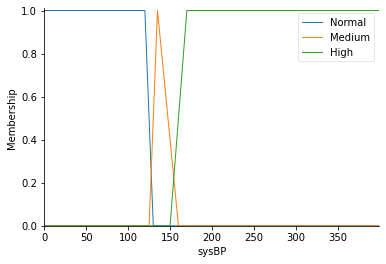

In [61]:
sysBP  = ctrl.Antecedent(np.arange(0, 400), 'sysBP')
sysBP['Normal'] = fuzz.trapmf(sysBP.universe, [-1, 0, 120, 130])
sysBP['Medium'] = fuzz.trimf(sysBP.universe, [125, 135, 160])
sysBP['High'] = fuzz.trapmf(sysBP.universe, [150, 170, 399, 400])

sysBP.view()

c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


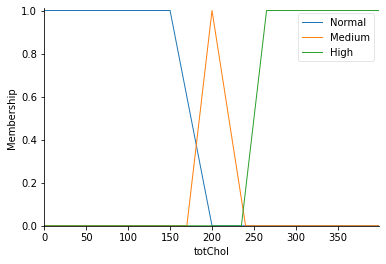

In [62]:
# age.automf(3)
totChol = ctrl.Antecedent(np.arange(0, 400), 'totChol')
totChol['Normal'] = fuzz.trapmf(totChol.universe, [-1, 0, 150, 200])
totChol['Medium'] = fuzz.trimf(totChol.universe, [170, 200, 240])
totChol['High'] = fuzz.trapmf(totChol.universe, [235, 265, 499, 500])
totChol.view()
# totChol 
# normal <200
# 200< medium <240
# high > 240


c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


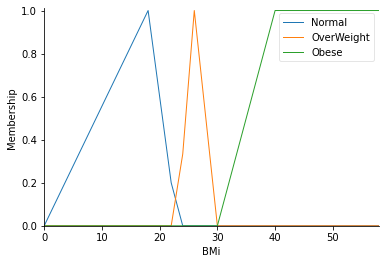

In [63]:
# age.automf(3)
BMi = ctrl.Antecedent(np.arange(0, 60,2), 'BMi')
BMi['Normal'] = fuzz.trimf(BMi.universe, [0, 18 , 23])
BMi['OverWeight'] = fuzz.trimf(BMi.universe, [23, 26, 30])
BMi['Obese'] = fuzz.trapmf(BMi.universe, [30, 40, 59, 60])
BMi.view()
# BMI
# normal <25
# overweiht 25-31
# obess > 31 

c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\term.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


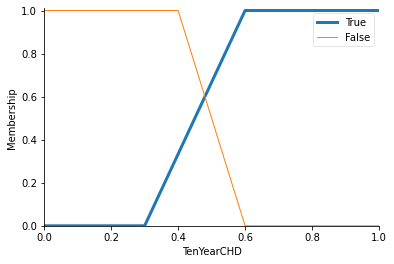

In [64]:
TenYearCHD = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'TenYearCHD')
TenYearCHD['True'] = fuzz.trapmf(TenYearCHD.universe, [0.3, 0.6, 1, 1.5])
TenYearCHD['False'] = fuzz.trapmf(TenYearCHD.universe, [-1, 0, 0.4, 0.6])

TenYearCHD['True'].view()

In [65]:
# rule1 = ctrl.Rule( BMi['obess'] | totChol['High'], TenYearCHD['True'])
# rule2 = ctrl.Rule(BMi['overWeight'] & cigsPerDay['heavily'], TenYearCHD['True'])
# rule3 = ctrl.Rule(totChol['Normal'], TenYearCHD['False'])
# rule4 = ctrl.Rule(male['True'] & BMi['overWeight'], TenYearCHD['False'])
# rule5 = ctrl.Rule(male['True'] & cigsPerDay['normal'], TenYearCHD['False'])

Rules for CHD --> False

In [95]:
rule1 = ctrl.Rule( BMi['Normal']| totChol['Normal']| sysBP['Normal']| cigsPerDay['Normal'], TenYearCHD['False'])

# rule19 = ctrl.Rule( ~BMi['Normal']| ~age['Adult'] | ~totChol['Normal']| ~sysBP['Normal']|  ~cigsPerDay['Normal'], TenYearCHD['True'])
rule3 = ctrl.Rule( BMi['OverWeight']| age['Adult'] | totChol['Medium']| sysBP['Medium']| cigsPerDay['Normal'], TenYearCHD['False'])

rule4 = ctrl.Rule( BMi['Normal']| age['Old']| totChol['Normal']| sysBP['Normal']| cigsPerDay['Normal'], TenYearCHD['False'])
rule5 = ctrl.Rule( BMi['OverWeight']| age['Old'] | totChol['Medium']| sysBP['Medium']| cigsPerDay['Normal'], TenYearCHD['False'])
rule6 = ctrl.Rule( BMi['Normal']| age['Old'] | totChol['High']| sysBP['High']| cigsPerDay['Normal'], TenYearCHD['False'])

rule7 = ctrl.Rule( BMi['Obese']| age['Old'] | totChol['Normal']| sysBP['Normal']| cigsPerDay['Normal'], TenYearCHD['False'])
rule8 = ctrl.Rule( BMi['OverWeight']| age['Old'] | totChol['Normal']| sysBP['Normal']| cigsPerDay['Normal'], TenYearCHD['False'])

rule9 = ctrl.Rule( BMi['Obese']| age['Old']| totChol['Normal']| sysBP['Normal']| cigsPerDay['Normal'], TenYearCHD['False'])
rule10 = ctrl.Rule( BMi['OverWeight']| age['Old']| totChol['Normal']| sysBP['Normal']| cigsPerDay['Normal'], TenYearCHD['False'])

Rules for CHD --> True

In [96]:
rule11 = ctrl.Rule( BMi['Obese'] | age['Adult'] | totChol['High'] | sysBP['High'] | cigsPerDay['Heavy'], TenYearCHD['True'])
rule12 = ctrl.Rule( BMi['Obese'] | age['Adult']  | totChol['High'] | sysBP['High'] | cigsPerDay['Heavy'], TenYearCHD['True'])

rule13 = ctrl.Rule( BMi['Obese'] & age['Old'] & totChol['Medium'] & sysBP['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])
rule14 = ctrl.Rule( BMi['Obese'] & age['Old'] & totChol['High'] & sysBP['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])

rule15 = ctrl.Rule( BMi['Obese'] & age['Old'] & totChol['Medium'] & sysBP['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])
rule16 = ctrl.Rule( BMi['Obese'] & age['Old'] & totChol['High'] & sysBP['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])

rule17 = ctrl.Rule( BMi['OverWeight'] & age['Old'] & totChol['High'] & sysBP['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])
rule18 = ctrl.Rule( BMi['OverWeight'] & age['Old'] & totChol['High'] & sysBP['High'] & cigsPerDay['Heavy'], TenYearCHD['True'])

rule19 = ctrl.Rule( cigsPerDay['Normal'], TenYearCHD['False'])
rule20 = ctrl.Rule( totChol['Medium'], TenYearCHD['False'])
rule21 = ctrl.Rule( BMi['Normal'] | age['Adult']  | totChol['Normal'] | sysBP['Normal'] | cigsPerDay['Normal'], TenYearCHD['False'])


In [97]:
CHD_Rules = ctrl.ControlSystem([rule1, rule3, rule4, rule5, rule6, rule7, rule8, rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21])
# CHD_Rules = ctrl.ControlSystem([rule1,rule19,rule21])
CHD = ctrl.ControlSystemSimulation(CHD_Rules)


In [69]:
dataFrame=dataFrame.drop([	'education','currentSmoker',	'BPMeds',	'prevalentStroke',	'prevalentHyp',	'diaBP','heartRate','glucose'], axis=1)

In [70]:
dataFrame= dataFrame.rename({'BMI':'BMi'}, axis=1)

In [71]:
data = dataFrame.drop(['TenYearCHD',"male","diabetes"], axis=1)

In [72]:
dataFrame.iloc[0]

male            1.00
age            39.00
cigsPerDay      0.00
diabetes        0.00
totChol       195.00
sysBP         106.00
BMi            26.97
TenYearCHD      0.00
Name: 0, dtype: float64

In [73]:
CHD.input['BMi'] = 16
CHD.input['cigsPerDay'] =  0
CHD.input['totChol'] =  80
# CHD.input['male'] = 0
CHD.input['age'] = 10
CHD.input['sysBP'] = 10

         

c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


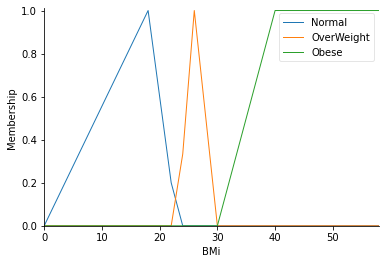

In [74]:
BMi.view()

In [86]:
data.iloc[3]

age            61.00
cigsPerDay     30.00
totChol       225.00
sysBP         150.00
BMi            28.58
Name: 3, dtype: float64

0.49999999999999994


c:\ProgramData\Anaconda3\envs\DeepLearning\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


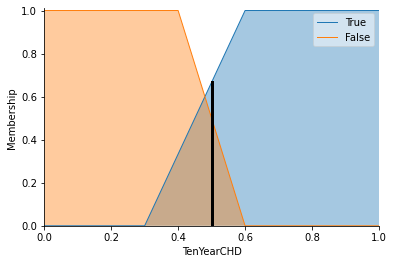

In [100]:

# CHD.input['BMi'] = 10
# CHD.input['cigsPerDay'] =  0
# CHD.input['totChol'] =  80
# # CHD.input['male'] = 0
# CHD.input['age'] = 10
# CHD.input['sysBP'] = 10

CHD.inputs(data.iloc[30])
         

CHD.compute()
print(CHD.output['TenYearCHD'])
TenYearCHD.view(sim=CHD)

In [101]:
import numpy as np

outs  = []
for _,v in data.iterrows():
    CHD.inputs(v)
    CHD.compute()
    out = CHD.output['TenYearCHD']
    outs.append(out > 0.5)


(np.array(outs) == dataFrame["TenYearCHD"]).sum()  /len(outs)

0.8299056375514154

In [94]:
dataFrame["TenYearCHD"].value_counts() /len(dataFrame)

0    0.848052
1    0.151948
Name: TenYearCHD, dtype: float64